In [56]:
import torch
import torchvision
import os
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F
from tqdm.notebook import tqdm
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.utils import make_grid
import torchvision.transforms as transforms
from torchvision.datasets.folder import default_loader
%matplotlib inline



In [57]:
artists = pd.read_csv("../input/best-artworks-of-all-time/artists.csv")

for i in artists['name']:
    print(i,end=" | ")

Amedeo Modigliani | Vasiliy Kandinskiy | Diego Rivera | Claude Monet | Rene Magritte | Salvador Dali | Edouard Manet | Andrei Rublev | Vincent van Gogh | Gustav Klimt | Hieronymus Bosch | Kazimir Malevich | Mikhail Vrubel | Pablo Picasso | Peter Paul Rubens | Pierre-Auguste Renoir | Francisco Goya | Frida Kahlo | El Greco | Albrecht Dürer | Alfred Sisley | Pieter Bruegel | Marc Chagall | Giotto di Bondone | Sandro Botticelli | Caravaggio | Leonardo da Vinci | Diego Velazquez | Henri Matisse | Jan van Eyck | Edgar Degas | Rembrandt | Titian | Henri de Toulouse-Lautrec | Gustave Courbet | Camille Pissarro | William Turner | Edvard Munch | Paul Cezanne | Eugene Delacroix | Henri Rousseau | Georges Seurat | Paul Klee | Piet Mondrian | Joan Miro | Andy Warhol | Paul Gauguin | Raphael | Michelangelo | Jackson Pollock | 

In [58]:
batch_size = 128
image_size = (64,64)
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)


In [59]:
transform_ds = transforms.Compose([transforms.Resize(image_size),
                                  transforms.ToTensor(),
                                  transforms.Normalize(*stats)])
train_ds = torchvision.datasets.ImageFolder(root = "../input/best-artworks-of-all-time/resized",
                                            transform = transform_ds)
train_dl = DataLoader(train_ds, batch_size, shuffle = True, num_workers = 3, pin_memory = True)
print(len(train_ds))

8683


TypeError: Invalid shape (128, 3, 64, 64) for image data

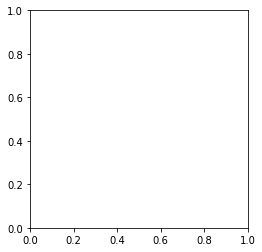

In [60]:
show_batch(train_dl)